In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sheets = pd.read_excel("C:/Users/Asus_TUF/Downloads/Regional Sales Dataset.xlsx", sheet_name=None)

In [3]:
print(sheets.keys())

dict_keys(['Sales Orders', 'Customers', 'Regions', 'State Regions', 'Products', '2017 Budgets'])


In [4]:
# assign dataframes to each sheet

df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_regions = sheets['Regions']
df_products = sheets['Products']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

In [5]:
df_sales.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost'],
      dtype='object')

In [6]:
df_state_reg.columns = df_state_reg.iloc[0]
df_state_reg = df_state_reg[1:].reset_index(drop = True)
df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [7]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [8]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [9]:
df_sales.isnull().sum()
df_customers.isnull().sum()
df_regions.isnull().sum()
df_budgets.isnull().sum()
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [10]:
print("df_products shape = ",(df_products.shape))
print("df_customers= ",(df_customers.shape))
print("df_regions = ",(df_regions.shape))
print("df_state_reg = ",(df_state_reg.shape))
print("df_budgets = ",(df_budgets.shape))
print("df_sales = ",(df_sales.shape))

df_products shape =  (30, 2)
df_customers=  (175, 2)
df_regions =  (994, 15)
df_state_reg =  (48, 3)
df_budgets =  (30, 2)
df_sales =  (64104, 12)


In [11]:
#**data cleaning and wrangling** 

In [12]:
df_sales.head(1)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343


In [13]:
df = df_sales.merge(
    df_customers, 
    how = 'left',
    left_on ='Customer Name Index',
    right_on = 'Customer Index'
)
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [14]:
# merge with products

df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [15]:
df = df.merge(df_budgets, 
              how='left',
              left_on='Product Name', 
              right_on='Product Name')
df.head(3)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26,5685138.270


In [16]:
print(df.columns)
print(df_budgets.columns)

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names',
       'Index', 'Product Name', '2017 Budgets'],
      dtype='object')
Index(['Product Name', '2017 Budgets'], dtype='object')


In [17]:
# merge with regions

df =  df.merge(
    df_regions,
    how = 'left',
    left_on = 'Delivery Region Index',
    right_on = 'id'
)
df.head(5)


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [18]:
# merge with state regions

df =  df.merge(
    df_state_reg[['State Code','Region']],
    how = 'left',
    left_on = 'state_code',
    right_on = 'State Code'
)
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [19]:
df.to_csv('file.csv')

In [20]:
#Customer Index
#Index
#id
#State Code

# Clean up redundant colummns
cols_to_drop = ['Customer Index','Index','id','State Code']
df = df.drop(columns = cols_to_drop,errors = 'ignore')
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast


In [21]:
# convert all column header to lowercase
df.columns = df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       '2017 budgets', 'name', 'county', 'state_code', 'state', 'type',
       'latitude', 'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region'],
      dtype=object)

In [22]:
#df.to_csv('newfile.csv')


In [23]:
#KEEP THE IMPORTANT COLUMMNS AND DELETE THE COLUMMNS THAT WE DONTT NEED

cols_to_keep = [
    'ordernumber', 'orderdate',
    'customer names','channel',
    'product name','order quantity',
    'unit price','line total',
    'total unit cost', 'county',
    'state_code','state',
    'latitude','longitude',
     'region','median_income',
    '2017 budgets'
]
df = df[cols_to_keep]
df.head(6)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,county,state_code,state,latitude,longitude,region,median_income,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,Chatham County,GA,Georgia,32.08354,-81.09983,South,36466,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,Johnson County,IN,Indiana,39.61366,-86.10665,Midwest,54176,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,Alameda County,CA,California,37.66243,-121.87468,West,124759,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,Monroe County,IN,Indiana,39.16533,-86.52639,Midwest,30019,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,Hartford County,CT,Connecticut,41.77524,-72.52443,Northeast,63158,1085037.329
5,SO - 0010394,2014-01-01,Zoovu Corp,Export,Product 23,11,5219.3,57412.3,4332.019,Hennepin County,MN,Minnesota,44.91330,-93.50329,Midwest,78589,1135815.758


In [24]:
df = df.rename(columns ={
    'ordernumber':'order_number',
    'orderdate':'order_date',
    'customer names':'customer_names',
    'order quantity':'order_quantity',
    'product name':'product_name',
    'unit price':'unit_price',
    'line total':'revenue',
    'state_code':'state',
    'state':'state_name',
    'latitude':'lat',
    'longitude':'long',
    '2017 budgets':'budget'
})
    
df.head(2)

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,total unit cost,county,state,state_name,lat,long,region,median_income,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,Chatham County,GA,Georgia,32.08354,-81.09983,South,36466,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,Johnson County,IN,Indiana,39.61366,-86.10665,Midwest,54176,2067108.120


In [25]:
#Blank out budgets for non 2017 orders

df.loc[df['order_date'].dt.year != 2017,'budget'] = pd.NA


#line total is revenue
df[['order_date','product_name','revenue','budget']]

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN
...,...,...,...,...
64099,2018-02-28,Product 26,21788.4,NaN
64100,2018-02-28,Product 21,5185.8,NaN
64101,2018-02-28,Product 13,43483.0,NaN
64102,2018-02-28,Product 20,27717.9,NaN


In [26]:
df.to_csv('final.csv')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   customer_names   64104 non-null  object        
 3   channel          64104 non-null  object        
 4   product_name     64104 non-null  object        
 5   order_quantity   64104 non-null  int64         
 6   unit_price       64104 non-null  float64       
 7   revenue          64104 non-null  float64       
 8   total unit cost  64104 non-null  float64       
 9   county           64104 non-null  object        
 10  state            64104 non-null  object        
 11  state_name       64104 non-null  object        
 12  lat              64104 non-null  float64       
 13  long             64104 non-null  float64       
 14  region           64104 non-null  objec

In [28]:


##feature engineering ##



In [29]:
df['total_cost']=df['order_quantity']*df['total unit cost']

In [30]:
df['profit'] = df['revenue'] - df['total_cost']

df['profit_margin_pct'] = df['profit']/df['revenue']*100
df.head(5)

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,total unit cost,county,state,state_name,lat,long,region,median_income,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,Chatham County,GA,Georgia,32.08354,-81.09983,South,36466,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,Johnson County,IN,Indiana,39.61366,-86.10665,Midwest,54176,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,Alameda County,CA,California,37.66243,-121.87468,West,124759,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,Monroe County,IN,Indiana,39.16533,-86.52639,Midwest,30019,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,Hartford County,CT,Connecticut,41.77524,-72.52443,Northeast,63158,NaN,10082.160,8249.040,45.0


In [31]:
##EDA##------------------------

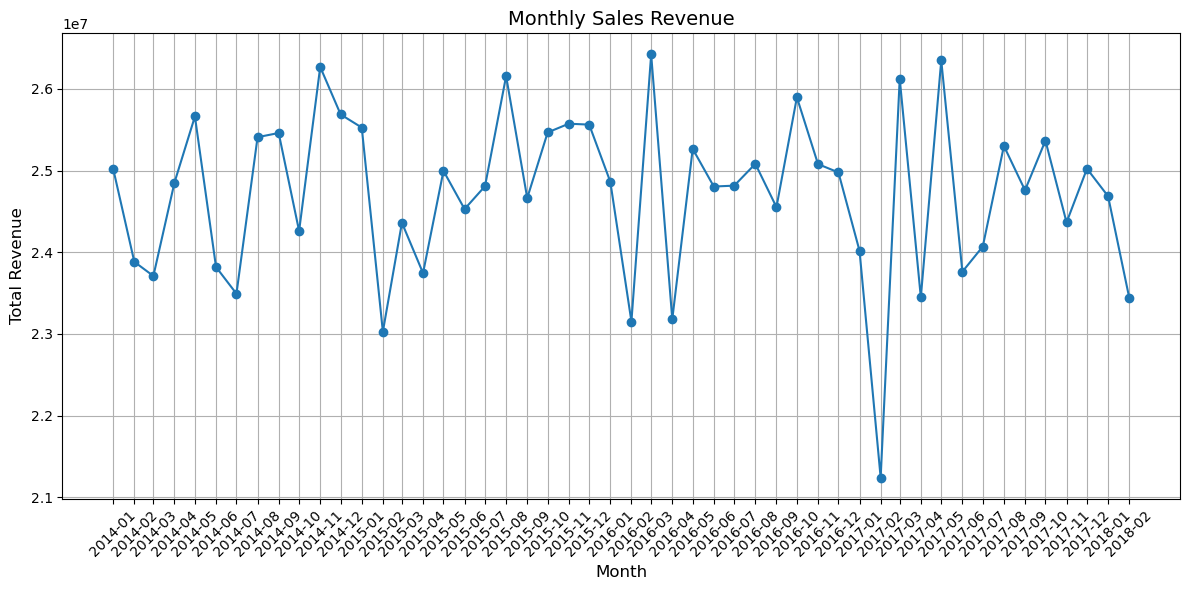

In [32]:

# Assuming your DataFrame is already loaded as 'df'
# If not, load it, e.g., df = pd.read_csv('your_file.csv')

# Convert 'order_date' to datetime
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d')

# Ensure revenue is numeric
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Aggregate revenue by month (including all months, including 2018-01 and 2018-02)
monthly_sales = df.groupby(df['order_date'].dt.to_period('M'))['revenue'].sum().reset_index()
monthly_sales['order_date'] = monthly_sales['order_date'].dt.to_timestamp()

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['order_date'], monthly_sales['revenue'], marker='o', linestyle='-', color='#1f77b4')
plt.title('Monthly Sales Revenue', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(True)

# Set x-axis ticks to show months (e.g., "2014-01", "2014-07", etc.)
plt.xticks(monthly_sales['order_date'], monthly_sales['order_date'].dt.strftime('%Y-%m'), rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [33]:
# Assuming df is your DataFrame (if not already)
# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Remove rows for January and February 2018
df_new = df[~((df['order_date'].dt.year == 2018) & (df['order_date'].dt.month.isin([1, 2])))]


In [34]:
print(df.columns)

Index(['order_number', 'order_date', 'customer_names', 'channel',
       'product_name', 'order_quantity', 'unit_price', 'revenue',
       'total unit cost', 'county', 'state', 'state_name', 'lat', 'long',
       'region', 'median_income', 'budget', 'total_cost', 'profit',
       'profit_margin_pct'],
      dtype='object')


C:\Users\Asus_TUF\AppData\Local\Temp\ipykernel_22040\3481169013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['order_date'] = pd.to_datetime(df_new['order_date'], format='%Y-%m-%d')
C:\Users\Asus_TUF\AppData\Local\Temp\ipykernel_22040\3481169013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month'] = df['order_date'].dt.month


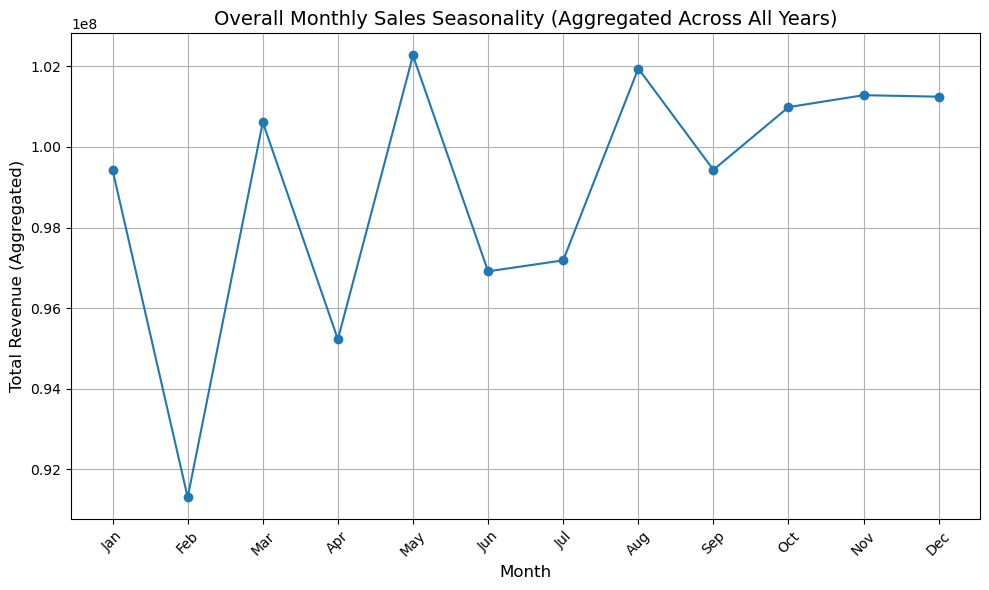

In [35]:


# Convert 'order_date' to datetime
df_new['order_date'] = pd.to_datetime(df_new['order_date'], format='%Y-%m-%d')

# Extract the calendar month (1-12)
df_new['month'] = df['order_date'].dt.month

# Aggregate revenue by calendar month across all years
monthly_aggregate = df_new.groupby('month')['revenue'].sum().reset_index()

# Rename columns for clarity
monthly_aggregate.columns = ['month', 'total_revenue']

# Map month numbers to names for better labeling (preserving order)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_aggregate['month_name'] = monthly_aggregate['month'].apply(lambda x: months[x-1])

# Create the line chart for seasonality trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_aggregate['month_name'], monthly_aggregate['total_revenue'], marker='o', color='#1f77b4', linestyle='-')
plt.title('Overall Monthly Sales Seasonality (Aggregated Across All Years)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (Aggregated)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

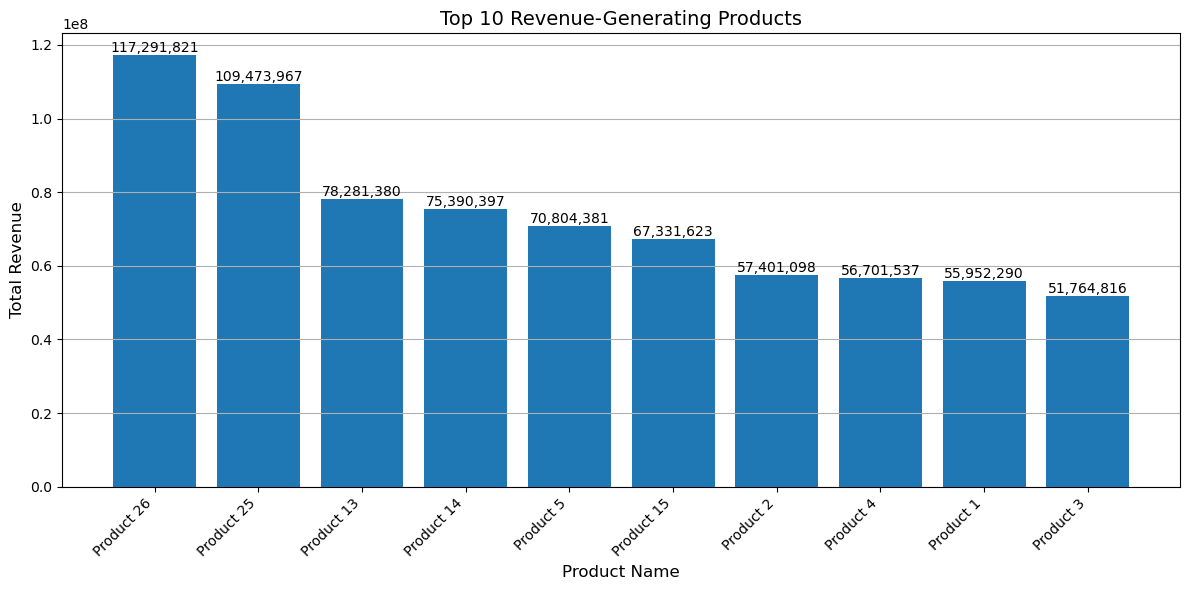

In [36]:
# Assuming your DataFrame is already loaded as 'df'
# If not, load it, e.g., df = pd.read_csv('your_file.csv')

# Ensure revenue is numeric
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Aggregate revenue by product_name
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()

# Sort by revenue in descending order and select top 10
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_products['product_name'], top_10_products['revenue'], color='#1f77b4')
plt.title('Top 10 Revenue-Generating Products', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(True, axis='y')

# Add total revenue labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:,.0f}',
             ha='center', va='bottom')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

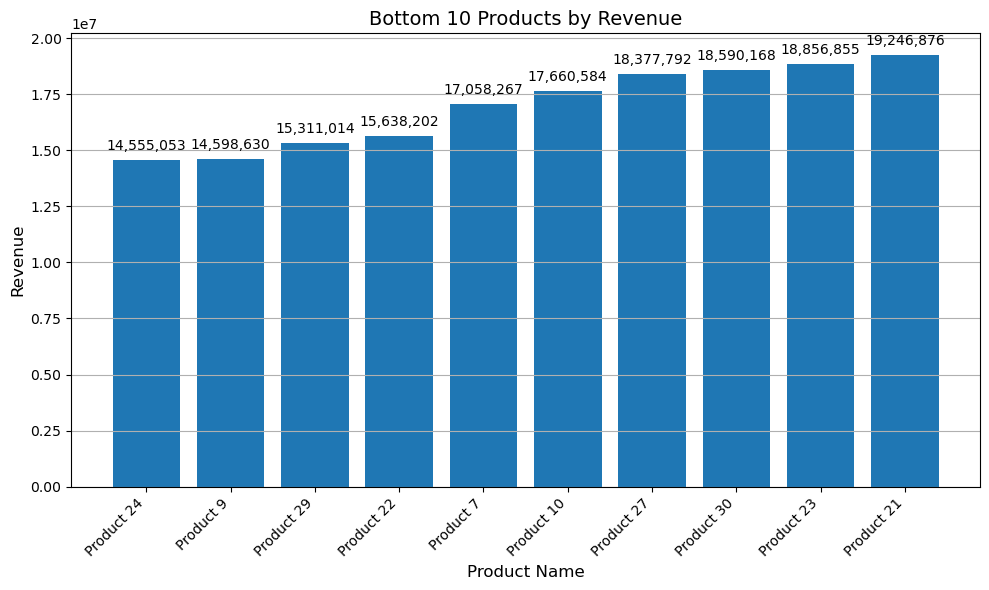

In [37]:


# Aggregate revenue by product_name
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()

# Get bottom 10 products by revenue
bottom_10_products = product_revenue.sort_values(by='revenue', ascending=True).head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(bottom_10_products['product_name'], bottom_10_products['revenue'], color='tab:orange')
# Add labels on top of each bar
for p in plt.bar(bottom_10_products['product_name'], bottom_10_products['revenue']):
    plt.annotate(f'{p.get_height():,.0f}',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black',
                 xytext=(0, 5), textcoords='offset points')

# Title and labels
plt.title('Bottom 10 Products by Revenue', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Revenue', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add grid
plt.grid(True, axis='y')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

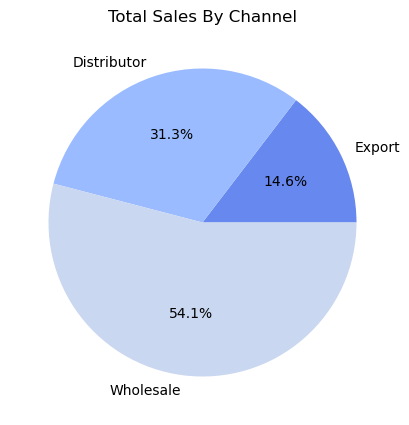

In [38]:
##sales by channel##

chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending = True)

plt.figure(figsize =(5,5))

plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm')
)
plt.title('Total Sales By Channel')
plt.show()

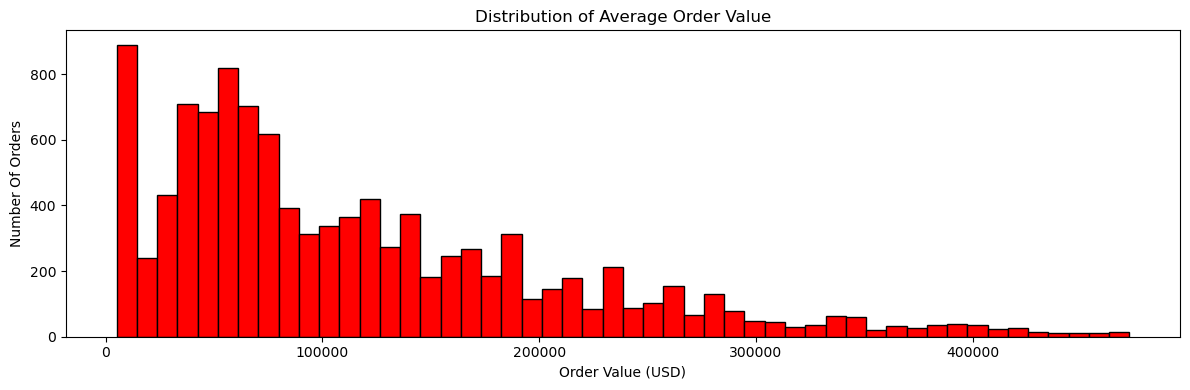

In [39]:
##Average Order Value (AOV) Distribution

aov = df.groupby('order_number')['revenue'].sum()

plt.figure(figsize=(12,4))

plt.hist(
    aov,
    bins=50,
    color='red',
    edgecolor='black',
)

plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number Of Orders')
plt.tight_layout()

plt.show()

In [40]:
## Unit Price distribution per Produt ##
## Top 10 States By Revenue and Order Count ##
## Average Profit Margin By Channel ##
## Top 10 Customers By Revenue and Bottom 10 Customers too ##
## Customer Segmentation : Revenue vs Profit Margin ##
## Correlation Heatmap



<Figure size 1200x600 with 0 Axes>

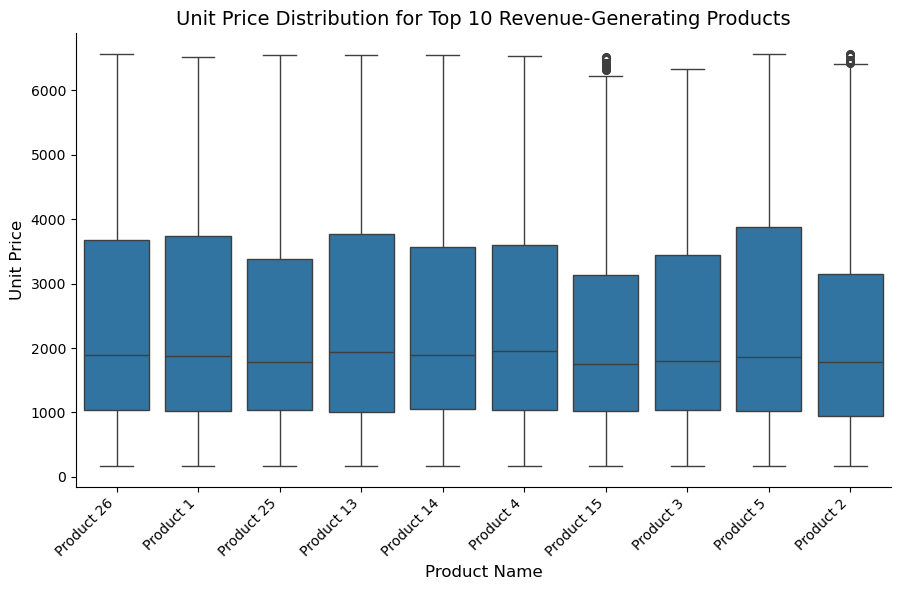

In [41]:
## Unit Price distribution per Produt ##
# Ensure unit_price is numeric
df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')

# Aggregate revenue by product_name to identify top 10
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()

# Get top 10 products by revenue
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)['product_name'].tolist()

# Filter df to include only rows for the top 10 products
df_top_10 = df[df['product_name'].isin(top_10_products)].copy()

# Drop any rows with NaN in unit_price or product_name to avoid issues
df_top_10 = df_top_10.dropna(subset=['unit_price', 'product_name'])

# Create the distribution plot using seaborn catplot (box plot per product)
plt.figure(figsize=(12, 6))
sns.catplot(x='product_name', y='unit_price', kind='box', data=df_top_10, height=6, aspect=1.5)
plt.title('Unit Price Distribution for Top 10 Revenue-Generating Products', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Unit Price', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

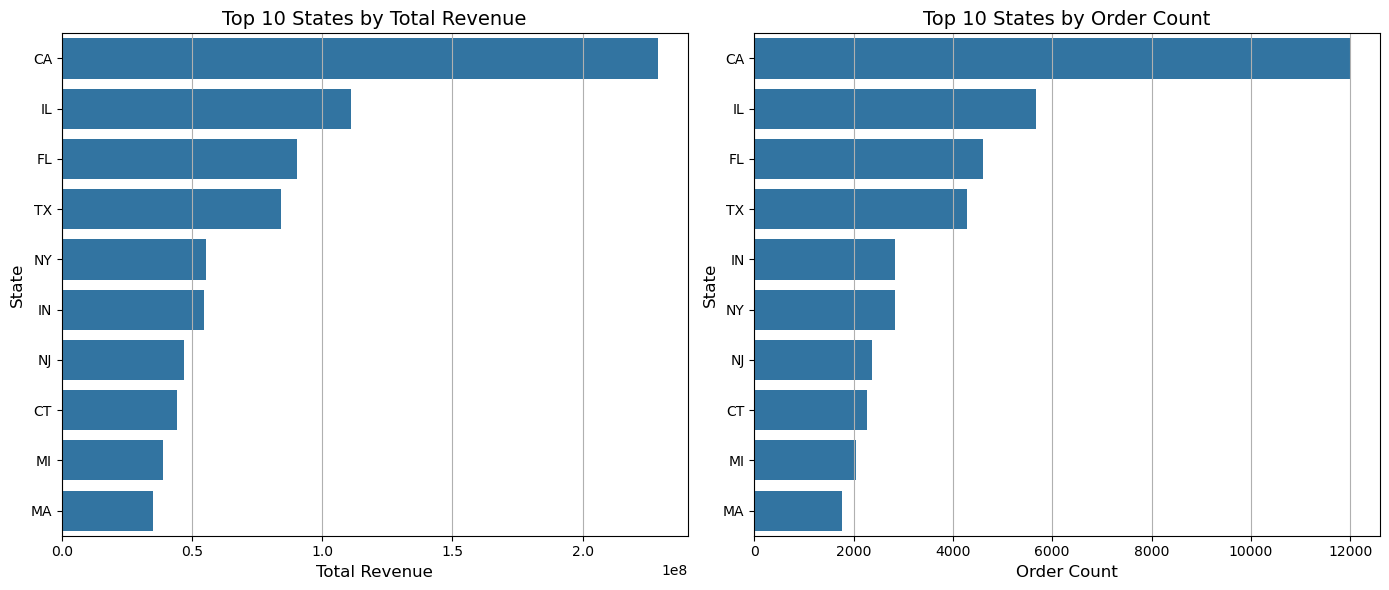

In [42]:


## Top 10 States By Revenue and Order Count ##

# Ensure revenue is numeric
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Calculate total revenue and order count by state
state_summary = df.groupby('state').agg(
    total_revenue=('revenue', 'sum'),
    order_count=('order_number', 'count')  # Use 'nunique()' for unique orders if needed
).reset_index()

# Sort by total_revenue and select top 10
top_10_revenue = state_summary.sort_values('total_revenue', ascending=False).head(10)

# Sort by order_count and select top 10
top_10_orders = state_summary.sort_values('order_count', ascending=False).head(10)

# Create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

# Plot 1: Top 10 States by Revenue
plt.subplot(1, 2, 1)
sns.barplot(x='total_revenue', y='state', data=top_10_revenue, color='#1f77b4', order=top_10_revenue.sort_values('total_revenue', ascending=False)['state'])
plt.title('Top 10 States by Total Revenue', fontsize=14)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.grid(True, axis='x')

# Plot 2: Top 10 States by Order Count
plt.subplot(1, 2, 2)
sns.barplot(x='order_count', y='state', data=top_10_orders, color='#1f77b4', order=top_10_orders.sort_values('order_count', ascending=False)['state'])
plt.title('Top 10 States by Order Count', fontsize=14)
plt.xlabel('Order Count', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.grid(True, axis='x')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\Asus_TUF\AppData\Local\Temp\ipykernel_22040\3776280840.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='channel', y='profit_margin_pct', data=channel_margin, palette='viridis')


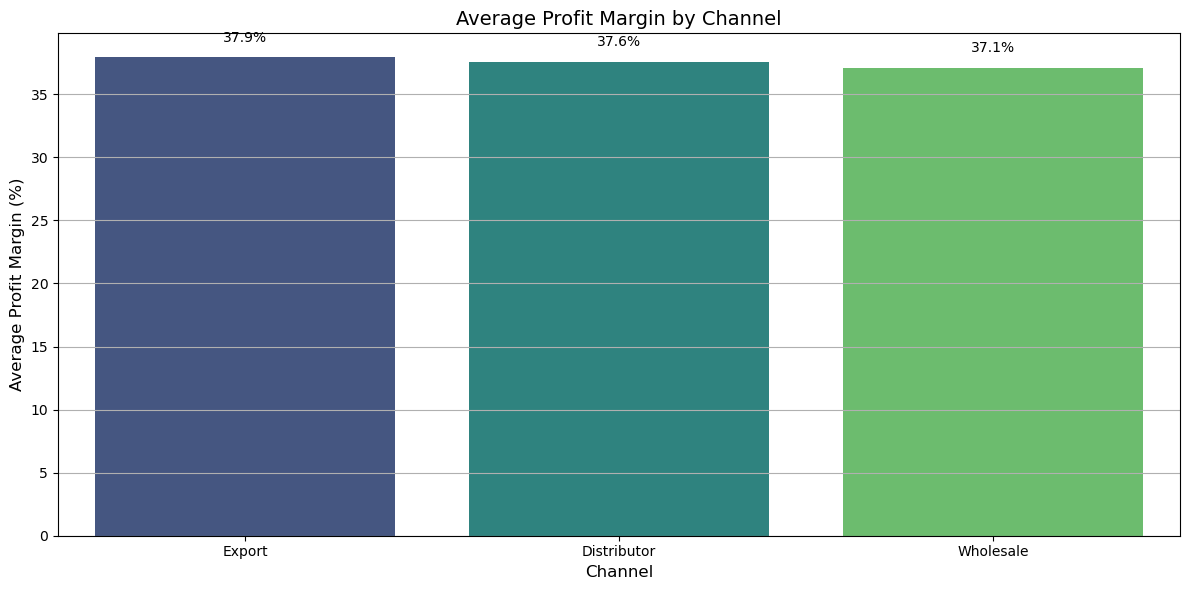

In [43]:
## Average Profit Margin By Channel ##

# Ensure profit_margin_pct is numeric (if not pre-calculated, derive it)
df['profit_margin_pct'] = pd.to_numeric(df['profit_margin_pct'], errors='coerce')
if df['profit_margin_pct'].isna().all():
    df['profit_margin_pct'] = (df['profit'] / df['revenue'] * 100).round(2)

# Calculate average profit margin by channel
channel_margin = df.groupby('channel')['profit_margin_pct'].mean().reset_index()

# Sort by average profit margin descending
channel_margin = channel_margin.sort_values('profit_margin_pct', ascending=False)

# Create the vertical bar chart using seaborn with a color palette
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='channel', y='profit_margin_pct', data=channel_margin, palette='viridis')

# Add percentage labels on top of each bar
for i, v in enumerate(channel_margin['profit_margin_pct']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

plt.title('Average Profit Margin by Channel', fontsize=14)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Average Profit Margin (%)', fontsize=12)
plt.grid(True, axis='y')


# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\Asus_TUF\AppData\Local\Temp\ipykernel_22040\1350380622.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='customer_names', data=top_10_customers, palette=green_palette, order=top_10_customers.sort_values('revenue', ascending=False)['customer_names'])
C:\Users\Asus_TUF\AppData\Local\Temp\ipykernel_22040\1350380622.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='customer_names', data=bottom_10_customers, palette=red_palette, order=bottom_10_customers.sort_values('revenue', ascending=True)['customer_names'])


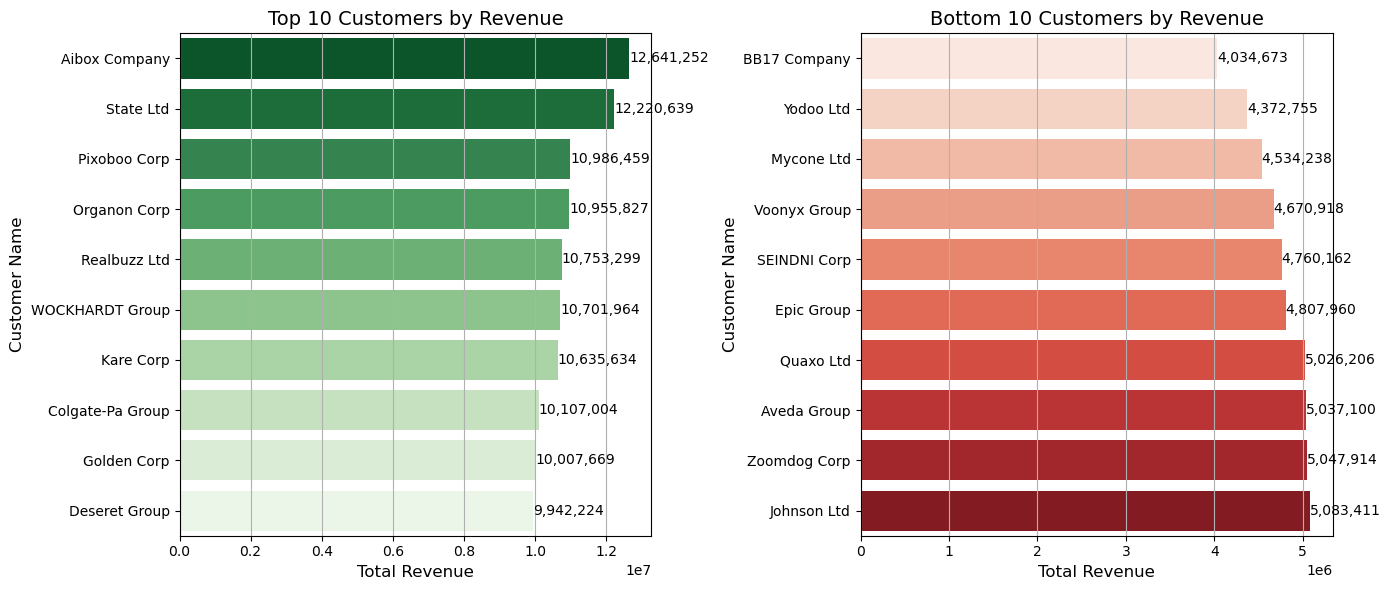

In [44]:
##Top 10 Customers By Revenue and Bottom 10 Customers


# Ensure revenue is numeric
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Calculate total revenue by customer
customer_revenue = df.groupby('customer_names')['revenue'].sum().reset_index()

# Sort and select top 10 customers by revenue
top_10_customers = customer_revenue.sort_values('revenue', ascending=False).head(10)

# Sort and select bottom 10 customers by revenue
bottom_10_customers = customer_revenue.sort_values('revenue', ascending=True).head(10)

# Create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

# Plot 1: Top 10 Customers by Revenue (Green gradient top to bottom)
plt.subplot(1, 2, 1)
# Custom green palette (top to bottom gradient)
green_palette = sns.color_palette("Greens_r", n_colors=len(top_10_customers))  # _r reverses gradient
sns.barplot(x='revenue', y='customer_names', data=top_10_customers, palette=green_palette, order=top_10_customers.sort_values('revenue', ascending=False)['customer_names'])
for i, v in enumerate(top_10_customers['revenue']):
    plt.text(v + 1, i, f'{v:,.0f}', ha='left', va='center', color='black')
plt.title('Top 10 Customers by Revenue', fontsize=14)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Customer Name', fontsize=12)
plt.grid(True, axis='x')

# Plot 2: Bottom 10 Customers by Revenue (Red gradient bottom to top)
plt.subplot(1, 2, 2)
# Custom red palette (bottom to top gradient)
red_palette = sns.color_palette("Reds", n_colors=len(bottom_10_customers))  # Normal order for bottom to top
sns.barplot(x='revenue', y='customer_names', data=bottom_10_customers, palette=red_palette, order=bottom_10_customers.sort_values('revenue', ascending=True)['customer_names'])
for i, v in enumerate(bottom_10_customers['revenue']):
    plt.text(v + 1, i, f'{v:,.0f}', ha='left', va='center', color='black')
plt.title('Bottom 10 Customers by Revenue', fontsize=14)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Customer Name', fontsize=12)
plt.grid(True, axis='x')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\Asus_TUF\AppData\Local\Temp\ipykernel_22040\4032100663.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='total_revenue', y='avg_profit_margin', data=customer_segment, size=50, alpha=0.6, palette='viridis')


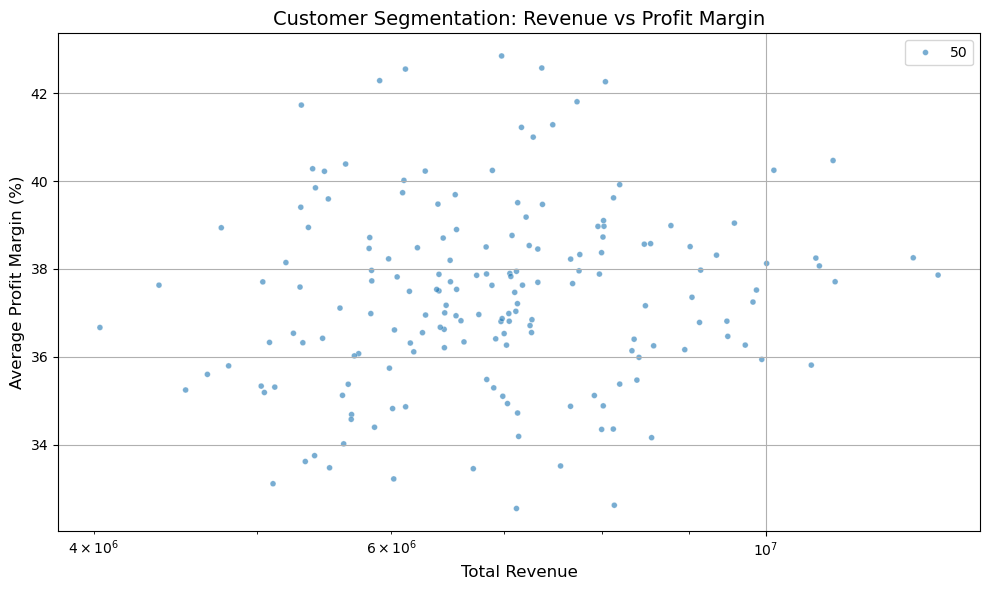

In [45]:
# Ensure revenue and profit_margin_pct are numeric (derive profit_margin_pct if needed)
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['profit_margin_pct'] = pd.to_numeric(df['profit_margin_pct'], errors='coerce')
if df['profit_margin_pct'].isna().all():
    df['profit_margin_pct'] = (df['profit'] / df['revenue'] * 100).round(2)

# Aggregate revenue and average profit margin by customer
customer_segment = df.groupby('customer_names').agg(
    total_revenue=('revenue', 'sum'),
    avg_profit_margin=('profit_margin_pct', 'mean')
).reset_index()

# Create the scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_revenue', y='avg_profit_margin', data=customer_segment, size=50, alpha=0.6, palette='viridis')

# Add labels and title
plt.title('Customer Segmentation: Revenue vs Profit Margin', fontsize=14)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Average Profit Margin (%)', fontsize=12)
plt.grid(True)

# Add a logarithmic scale for revenue if range is wide
plt.xscale('log')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

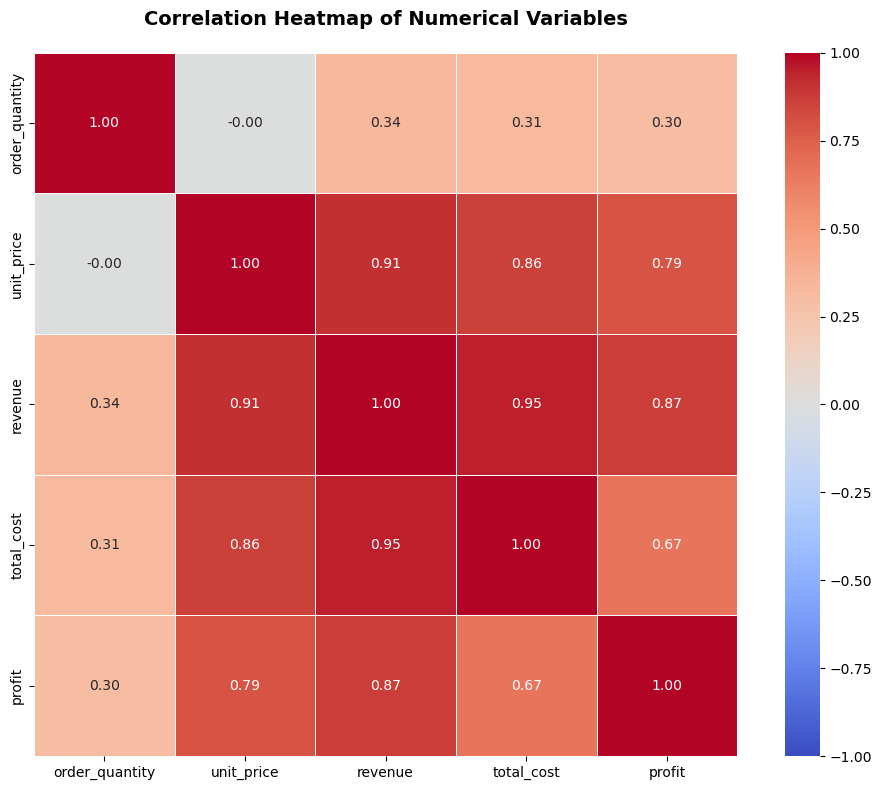

In [51]:
# Select numerical columns for correlation
num_cols =['order_quantity','unit_price','revenue','total_cost','profit']
correlation_matrix = df[num_cols].corr()

# Create the correlation heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, fmt='.2f', linewidths=0.5)

# Customize title and labels
plt.title('Correlation Heatmap of Numerical Variables', fontsize=14, fontweight='bold', pad=20)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [53]:
print(df.columns)

Index(['order_number', 'order_date', 'customer_names', 'channel',
       'product_name', 'order_quantity', 'unit_price', 'revenue',
       'total unit cost', 'county', 'state', 'state_name', 'lat', 'long',
       'region', 'median_income', 'budget', 'total_cost', 'profit',
       'profit_margin_pct'],
      dtype='object')


In [54]:
df.to_csv('dashboard.csv')